In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import skimage.io as io
from skimage import util

from glob import glob
import trackpy

import ast
from ipywidgets import interact, widgets


# import code from the src
### import code from src folder
import sys
sys.path.append('../src/')
import chow_test_v

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [6]:
file_list=glob("../results/Anchor_area*")
file_list

['../results/Anchor_area_43125_Dark.csv',
 '../results/Anchor_area_43122_Dark.csv',
 '../results/Anchor_area_43123_Dark.csv',
 '../results/Anchor_area_43121_Dark.csv']

In [8]:
Data_anchor=pd.DataFrame()
for file in file_list:
    df=pd.read_csv(file)
    Data_anchor=pd.concat([df,Data_anchor])
Data_anchor

Unnamed: 0  particle    mean_area  overapped_area  traj_len      type  \
0            0         0  1144.600000        0.436834        20  rotating   
1            1         2   640.800000        0.427591        20  rotating   
2            2         3   747.350000        0.280993        20  rotating   
3            3         5   674.900000        0.697881        20     fixed   
4            4         6  1212.800000        0.917711        20     fixed   
..         ...       ...          ...             ...       ...       ...   
64          64       103   511.333333        0.643416        12     fixed   
65          65       104   514.722222        0.714949        18     fixed   
66          66       107   523.000000        0.596558         5     fixed   
67          67       113   520.285714        0.126853         7  rotating   
68          68       117  1775.000000        0.970704         5     fixed   

   file_prefix  
0   43121_Dark  
1   43121_Dark  
2   43121_Dark  
3   43121_Dark  
4   43121_Dark  
..         ...  
64  43125_Dark  
65  43125_Dark  
66  43125_Dark  
67  43125_Dark  
68  43125_Dark  

[192 rows x 7 columns]

In [83]:
Df=[]
for id,group in Data_anchor.groupby('file_prefix'):
    df=group["type"].value_counts()
    df['file_prefix']=id
    df['total']=df["fixed"]+df["rotating"]+df["moving"]
    Df.append(df)
#     df=pd.DataFrame(df.values.T,columns=group["type"].value_counts().index)
#     df["total"]=df.sum()
#     df["percentage"]=df/df.sum()

In [90]:
Df=pd.DataFrame(Df)
Df["fixed_percent"]=Df["fixed"]/Df["total"]
Df["rotating_percent"]=Df["rotating"]/Df["total"]
Df["moving_percent"]=Df["moving"]/Df["total"]
Df["time"]=''

In [92]:
Df=Df.set_index("time")

<Figure size 720x720 with 0 Axes>

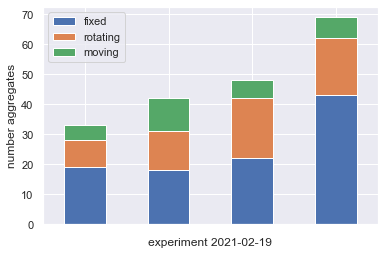

In [94]:
sns.set()
plt.figure(figsize=(10,10))
Df[['fixed','rotating','moving']].plot(kind='bar', stacked=True)
plt.xlabel("experiment 2021-02-19");
plt.ylabel("number aggregates");

plt.savefig("../results/classes_summary_abs.png",bbox_inches="tight")

<Figure size 1080x720 with 0 Axes>

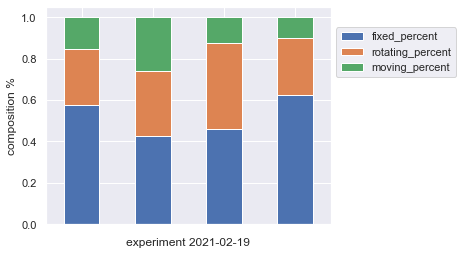

In [95]:
sns.set()



plt.figure(figsize=(15,10))
g=Df[['fixed_percent','rotating_percent','moving_percent']].plot(kind='bar', stacked=True)
plt.xlabel("experiment 2021-02-19");
plt.ylabel("composition %");

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
g.legend(loc='lower left', bbox_to_anchor=(1, 0.65), ncol=1)

plt.savefig("../results/classes_summary_percent.png",bbox_inches="tight");